In [1]:
%matplotlib inline

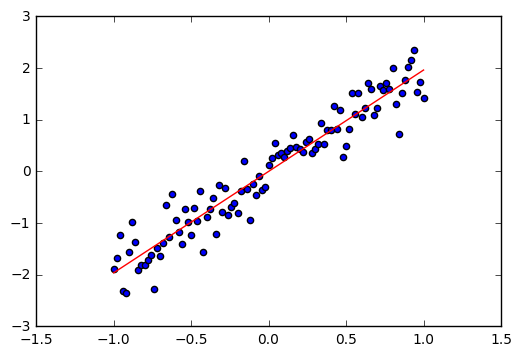

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.01
training_epochs = 100

x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

X = tf.placeholder("float")
Y = tf.placeholder("float")

def model(X, w):
    return tf.mul(X, w)

w = tf.Variable(0.0, name="weights")

y_model = model(X, w)
cost = (tf.square(Y-y_model))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

for epoch in range(training_epochs):
    for (x, y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X: x, Y: y})
    w_val = sess.run(w)

sess.close()
plt.scatter(x_train, y_train)
y_learned = x_train*w_val
plt.plot(x_train, y_learned, 'r')
plt.show()